**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
from google.colab import files
upload = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [4]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [7]:
param_grid = {
    'max_depth' : [3,6,9,12,10,50,100,200],
    'n_estimators' : [3,6,9,12,10,50,100,200] 
    }

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [9]:
from sklearn.model_selection import GridSearchCV

In [12]:
X_train.shape

(21331, 17)

In [16]:
cv = GridSearchCV(param_grid=param_grid, scoring = 'roc_auc', n_jobs = None, iid=False, refit=True, estimator = rf, cv=4, verbose=2, pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [17]:
cv.fit(X_train,y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
[CV] max_depth=3, n_estimators=3 .....................................
[CV] ...................... max_depth=3, n_estimators=3, total=   0.1s
[CV] max_depth=3, n_estimators=3 .....................................
[CV] ...................... max_depth=3, n_estimators=3, total=   0.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV] ...................... max_depth=3, n_estimators=3, total=   0.0s
[CV] max_depth=3, n_estimators=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... max_depth=3, n_estimators=3, total=   0.0s
[CV] max_depth=3, n_estimators=6 .....................................
[CV] ...................... max_depth=3, n_estimators=6, total=   0.1s
[CV] max_depth=3, n_estimators=6 .....................................
[CV] ...................... max_depth=3, n_estimators=6, total=   0.1s
[CV] max_depth=3, n_estimators=6 .....................................
[CV] ...................... max_depth=3, n_estimators=6, total=   0.1s
[CV] max_depth=3, n_estimators=6 .....................................
[CV] ...................... max_depth=3, n_estimators=6, total=   0.1s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ...................... max_depth=3, n_estimators=9, total=   0.1s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] ...................... max_depth=3, n_estimators=9, total=   0.1s
[CV] max_depth=3, n_estimators=9 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed:  8.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [20]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.043256,0.003759,0.004518,0.000378,3,3,"{'max_depth': 3, 'n_estimators': 3}",0.735632,0.742006,0.763023,0.764261,0.751231,0.012622,45,0.762451,0.759654,0.753388,0.754808,0.757575,3.649989e-03
1,0.078355,0.001153,0.005527,0.000153,3,6,"{'max_depth': 3, 'n_estimators': 6}",0.739184,0.744492,0.768475,0.766366,0.754629,0.012950,44,0.766346,0.761445,0.754626,0.759234,0.760413,4.217577e-03
2,0.120674,0.001780,0.006726,0.000117,3,9,"{'max_depth': 3, 'n_estimators': 9}",0.740064,0.748249,0.773263,0.770180,0.757939,0.014125,35,0.767631,0.766475,0.760048,0.763147,0.764325,2.968093e-03
3,0.160110,0.002645,0.007941,0.000102,3,12,"{'max_depth': 3, 'n_estimators': 12}",0.740239,0.748372,0.772726,0.771726,0.758266,0.014258,34,0.768715,0.768241,0.760763,0.763495,0.765303,3.322300e-03
4,0.132414,0.000444,0.007195,0.000183,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,36,0.767973,0.767158,0.760550,0.763683,0.764841,2.955178e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.654777,0.007135,0.017505,0.000446,200,12,"{'max_depth': 200, 'n_estimators': 12}",0.722768,0.719182,0.736082,0.738587,0.729155,0.008324,50,0.999422,0.999534,0.999511,0.999436,0.999476,4.761300e-05
60,0.547210,0.008020,0.015030,0.000376,200,10,"{'max_depth': 200, 'n_estimators': 10}",0.719099,0.716455,0.726477,0.732393,0.723606,0.006263,53,0.998988,0.999059,0.999169,0.999031,0.999062,6.702826e-05
61,2.651784,0.028945,0.060889,0.000326,200,50,"{'max_depth': 200, 'n_estimators': 50}",0.749988,0.740645,0.770952,0.760678,0.755566,0.011364,40,0.999986,0.999995,0.999996,0.999979,0.999989,6.863676e-06
62,5.247294,0.031938,0.119471,0.001993,200,100,"{'max_depth': 200, 'n_estimators': 100}",0.754540,0.746899,0.773768,0.762207,0.759353,0.009927,31,0.999997,0.999997,0.999999,0.999992,0.999996,2.597821e-06


In [24]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
feat_imp_df = pd.DataFrame({
    'Feature name' : 
})

**Find the best hyperparameters from the cross-validation.**

In [22]:
cv.best_params_

{'max_depth': 9, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [28]:
# Create a 5x5 grid
x_exam, y_exam = np.meshgrid(range(5), range(5))
z_exam = np.arange(1,17).reshape(4,4)
z_exam



array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [30]:
# Set color map to `plt.cm.jet`
cmap = plt.cm.jet

Text(0, 0.5, 'Y coordinates')

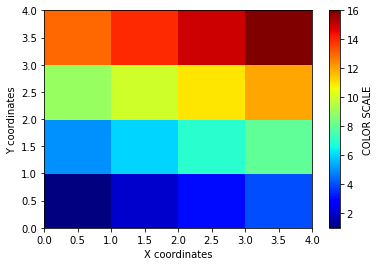

In [34]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(x_exam, y_exam, z_exam, cmap=cmap)
plt.colorbar(pcolor_ex, label='COLOR SCALE')
ax.set_xlabel('X coordinates')
ax.set_ylabel('Y coordinates')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [47]:
 fname = features_response[:-1]

In [49]:
#create a dataframe of featurename and importance  
feat_imp_df = pd.DataFrame({ 
    'Feature name': fname,
    'Importance' :cv.best_estimator_.feature_importances_})


In [51]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
